<title>
    <h1>
        Titanic e seus dados aleatórios, ou não
    </h1>
</title>

<p>
    Essa será uma história diferente das muitas que apareceram sobre o navio que ficou mais conhecido pelo filme, do que pela tragédia em si. Sim, todos sabem que é verdade isso.
</p>
<p>
    Enfim, sabemos muito sobre ele baseado no filme e no que as vezes é falado.
</p>
<p>
    Mas hoje, pensaremos fora do óbvio, descobrir informações que nunca foram mostradas antes na história da TV brasileira.
</p>
<p>
    Até porque todos sabem o óbvio já. Que era um navio, que bateu no iceberg e que já faz mais de 84 anos que a Rose deixou o Jack morrer, umas vez que os dois cabiam na porta.
</p>
<p>
    Verdades dificeis de engolir a parte, traremos dados que poderão ou não mudar seus conceitos<s> na hora de reservar sua estada em um cruzeiro</s>.
</p>
<p>
    Abaixo estão listadas as perguntas que serão respondidas com os dados:
</p>


<ul>
    <li>Viver sozinho ou morrer acompanhado?</li>
    <li>A relação entre os pais e os filhos afeta na sobrevivencia?</li>
    <li>A diferença de poder aquisitivo entre homens e mulheres já era visível em 1912?</li>
    <li>Desigualdade social faz diferença em um nalfrágio?</li>
</ul>

<h3>Vamos aos dados</h3>

<p>Nessa parte será feita a preparação dos dados, alterando o que parecer necessário.</p>

In [29]:
import pandas as pnds
import pyarrow.parquet as pq
import seaborn as sbn
import matplotlib.pyplot as mplt

In [30]:
titanic = pq.read_table(source='titanic.parquet').to_pandas()
titanic.head()

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0,373450,8.0500,None,S


<p>
    Foi encontrada uma grande dificuldade no momento de importar os dados que estavam no formato parquet, depois de certa peleja foi encontrada a solução através do pyrrow.
</p>
<p>
    A fim de manter uma visualização mais limpa, vamos retirar algumas informações que não terão valia para as análises que serão realizadas.
</p>

In [31]:
titanic.drop(['ticket', 'cabin', 'embarked', 'fare'], axis=1, inplace=True)
titanic.head()

,name,survival,pclass,sex,age,sibsp,parch
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0


<p>Agora que os dados parecem mais limpos, os dados terão os rótulos modificados para que a compreensão seja facilitada.</p>

In [32]:
titanic.columns=['Nome', 'Sobrevivente', 'Classe', 'Sexo', 'Idade', 'Irmãos/Conjuges', 'Pais/Filhos']
titanic.head()

,Nome,Sobrevivente,Classe,Sexo,Idade,Irmãos/Conjuges,Pais/Filhos
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0


<p>Para melhor compreenssão, iremos alterar também o idioma da coluna sexo, e mudar a sobrevivencia para SIM ou NÃO.</p>

In [33]:
titanic['Sexo'] = titanic['Sexo'].replace(['male','female'],['Masculino','Feminino'])
titanic['Sobrevivente'] = titanic['Sobrevivente'].replace([0,1],['Não','Sim'])
titanic.head()

,Nome,Sobrevivente,Classe,Sexo,Idade,Irmãos/Conjuges,Pais/Filhos
0,"Braund, Mr. Owen Harris",Não,3,Masculino,22.0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Sim,1,Feminino,38.0,1,0
2,"Heikkinen, Miss. Laina",Sim,3,Feminino,26.0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Sim,1,Feminino,35.0,1,0
4,"Allen, Mr. William Henry",Não,3,Masculino,35.0,0,0


<h4>Catálogo de Dados</h4>

<table>
    <tr>
        <th>Campo</th>
        <th>Descrição</th>
    </tr>
    <tr>
        <td>Nome</td>
        <td>Nome do Passageiro</td>
    </tr>
    <tr>
        <td>Sobrevivente</td>
        <td>[1]Sim / [0]Não</td>
    </tr>
    <tr>
        <td>Classe</td>
        <td>Classe do bilhete [1°,2°,3°]</td>
    </tr>
    <tr>
        <td>Sexo</td>
        <td>Sexo do Passageiro</td>
    </tr>
    <tr>
        <td>Idade</td>
        <td>Idade em anos</td>
    </tr>
    <tr>
        <td>Irmãos/Conjuges</td>
        <td>Possui irmãos/cônjuges a bordo do Titanic (0 = Não, 1 = Sim)</td>
    </tr>
    <tr>
        <td>Pais/Filhos</td>
        <td>Possui pais/filhos a bordo do Titanic (0 = Não, 1 = Sim)</td>
    </tr>
</table>

    

<p><small-caption>*** Não leve a mal o senso de humor da pessoa que tenta transformar dados em informações, apesar do contexto, podem ser informações relevantes ao digno leitor!</small-caption></p>

<h3>Viver sozinho ou morrer acompanhado?</h3>

<img src = '.\images\top1.gif'></img>
    
<p>
    Ao se pensar em questões que poderiam ser levantadas, foi feita uma pesquisa a fim de se pensar em quais perguntas os dados poderiam responder. Pensando nisso, vieram várias questões, porém a maioria já vinham com meias respostas ou pareciam um tanto óbvias. Em busca de um diferencial no que diz respeito a criatividade, foi questionado se haveria relação ou correlação entre os sobreviventes e seu estado civíl ou presença de irmãos a bordo.
</p>
<p>
    Pertinente ou não, abaixo veremos se os dados responderão nossas perguntas.
</p>

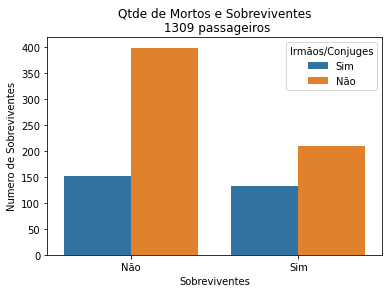

In [34]:
titanic['Irmãos/Conjuges'] = titanic['Irmãos/Conjuges'].replace([2,3,4,5,7,8], [1,1,1,1,1,1])
titanic['Irmãos/Conjuges'] = titanic['Irmãos/Conjuges'].replace ([0,1],['Não', 'Sim'])
top1= sbn.countplot(data=titanic, x='Sobrevivente', hue='Irmãos/Conjuges')

mplt.title ('Qtde de Mortos e Sobreviventes\n %s passageiros' % (titanic.shape[0]))
mplt.xlabel ('Sobreviventes')
mplt.ylabel ('Numero de Sobreviventes')
mplt.show()

<p>
    Ao se buscar respostas, foi verificado que a quantidade de acompanhantes não fazia diferença para a pergunta em questão. Por esse motivo foi alterada a informação para que se soubesse se haviam acompanhantes ou não.
</p>
<p>
    Pelo que podemos ver no gráfico acima, a maioria das pessoas no geral, estavam desacompanhadas de irmãos ou conjuges, porém é possível notar que há uma diferença grande nos que morreram entre os acompanhados e os desacompanhados.
</p>
<p>
    Essa diferença pode nos fazer pensar que quem estava acompanhado de irmãos ou conjuges tiveram algo a mais que os fizessem sobreviver, ou que quem estava sozinho teve menos vontade ou condição de sobreviver. 
</p>

<h3>A relação entre os pais e os filhos afeta na sobrevivencia?</h3>

<img src = '.\images\top2.gif'></img>

<p>
    A priori iniciaremos a verificação de forma semelhante a anterior, para que de forma genérica, dê para saber se quem estava com seu pai, mãe ou filhos a bordo sobreviveu mais ou menos.
</p>

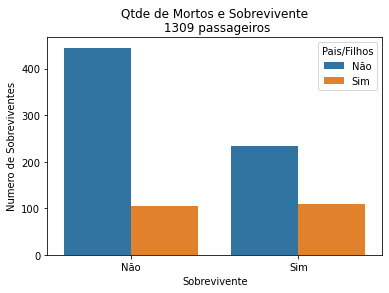

In [35]:
titanic['Pais/Filhos']=titanic['Pais/Filhos'].replace([1,2,3,4,5,6,9], [1,1,1,1,1,1,1])
titanic['Pais/Filhos']=titanic['Pais/Filhos'].replace([1,0], ['Sim', 'Não'])
top2 = sbn.countplot(data=titanic, x='Sobrevivente', hue='Pais/Filhos')

mplt.title ('Qtde de Mortos e Sobrevivente\n %s passageiros' % (titanic.shape[0]))
mplt.xlabel ('Sobrevivente')
mplt.ylabel ('Numero de Sobreviventes')
mplt.show()

<p>
    Novamente vemos que a maioria estava desacompanhada de pai, mãe ou filhos. O que unido ao tópico anterior nos leva a uma nova informação: <br>
    É possível afirmar baseado nos registros que foram passados que a maioria dos passageiros viajou sozinho. 
</p>

<h3>A diferença de poder aquisitivo entre homens e mulheres já era visível em 1912?</h3>

<img src='.\images\top3.gif'> </img>

<p>
    Nessa etapa iremos avaliar se há alguma descrepancia no que diz respeito a quantidade de homens e mulheres, dividindo esses pela Classe. Hoje em dia, graças a vários estudos relacionados ao tema, já é conhecido que os homens possuem mais patrimônio e poder aquisitivo em relação as mulheres. Porém, será que a comparação de classe ocupada no titanic pode nos trazer alguma nova informação? 
</p>

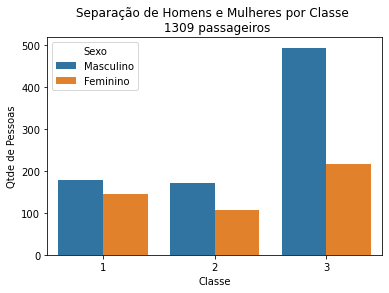

In [36]:
top3 = sbn.countplot(data=titanic, x='Classe', hue='Sexo')

mplt.title ('Separação de Homens e Mulheres por Classe \n %s passageiros' % (titanic.shape[0]))
mplt.xlabel ('Classe')
mplt.ylabel ('Qtde de Pessoas')
mplt.show()

<p>
    O gráfico pode ter vários pontos a serem ressaltados, como por exemplo a visivel maioria masculina que independe da classe. Outro ponto que achei necessário apontar é a grande diferença na terceira classe entre os homens e as mulheres.
</p>
<p>
    Seria necessário um estudo mais aprofundado para se validar o porque dessa diferença, como cogitar que as pessoas dessa terceira classe seriam trabalhadores do navio, sendo que essa visão fez com que fosse visivel também outra questão.
</p>
<p>
    Mesmo as mulheres sendo a minoria absoluta na terceira classe, elas ainda sim estão em maior quantidade que os homens da primeira ou da segunda classe, sendo  que unidas aos homens, a terceira classe consegue superar outras duas classes sozinha, o que me levou ao ultimo insight.
</p>

<h3>Desigualdade social faz diferença em um nalfrágio?</h3>

<img src='./images/top4.gif'> </img>

<p>
    Levando em consideração o ultimo tópico, foi avaliado como interessante verificar a proporção de sobrevivencia em relação as classes viajantes. Será que o motivo todo mundo já conhece, sendo que o de cima vem a subir e o de baixo desce? Piadas ruins a parte, vamos analisar os dados e verificar se há uma resposta interessante.
</p>

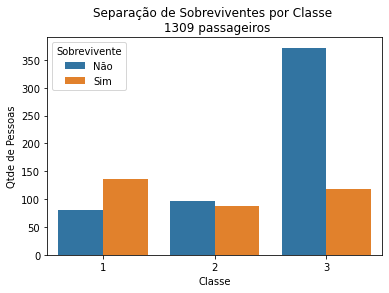

In [37]:
top4 = sbn.countplot(data=titanic, x='Classe', hue='Sobrevivente')

mplt.title ('Separação de Sobreviventes por Classe \n %s passageiros' % (titanic.shape[0]))
mplt.xlabel ('Classe')
mplt.ylabel ('Qtde de Pessoas')
mplt.show()

<p>
    Com essa visualização, podemos notar que proporcionalmente as pessoas da terceira classe foram os mais prejudicados. Pelo que pesquisei isso se deu pela estrutura do próprio navio, onde os botes ficam na parte mais alta e também onde a primeira classe fica, e por sua vez a terceira classe fica na parte mais distante dos botes.
</p>

<h3>Conclusão</h3>



<p>
    Conclui-se então que a tragédia do Titanic trouxe algumas questões vistas ainda hoje, como por exemplo a desigualdade social e também questões relacionadas a quem estava acompanhado de familiares no momento da tragédia, cabendo ainda outras análises a serem feitas, porém o que salta aos olhos durante todo o trabalho é a quantidade de vidas perdidas no acontecido, vidas de homens, mulheres, crianças, pobres e ricos.
</p>